In [1]:
import pandas as pd
import mysql.connector
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql

In [2]:
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='1234',
    database='ecommerce'
)
cursor = conn.cursor()

# List all unique cities where customers are located                                                                     

In [4]:
query = """select distinct customer_city from customers"""

cursor.execute(query)
data = cursor.fetchall()
data

(('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [6]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""

cursor.execute(query)
data = cursor.fetchall()
"total oders placed in 2017 are", data[0] [0]

('total oders placed in 2017 are', 45101)

# Find the total sales per category      

In [8]:
query = """
SELECT products.product_category, round(SUM(payments.payment_value),2) AS sales
FROM products
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY products.product_category
"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Sales"])
df


,Category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


# Calculate the percentage of orders that were paid in installments.

In [10]:
query = """select (sum(case when payment_installments >=1 then 1 else 0 end))/count(*)*100 from payments"""

cursor.execute(query)
data = cursor.fetchall()
"the percentage of orders that were paid in installments",data[0] [0]

('the percentage of orders that were paid in installments', Decimal('99.9981'))

# Count the number of customers from each state

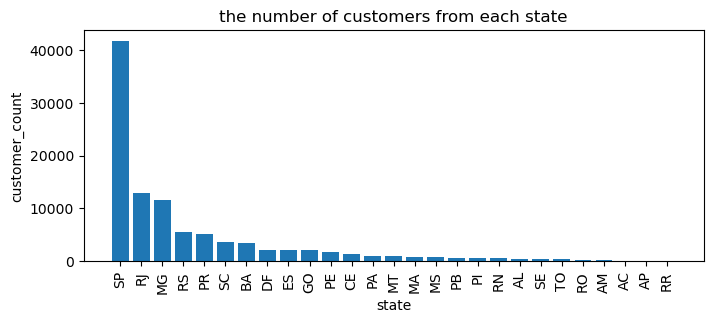

In [12]:
query = """select customer_state,count(customer_id) from customers group by customer_state"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["state","customer_count"])
df = df.sort_values(by = "customer_count", ascending = False)
plt.figure(figsize = (8,3))
plt.bar(df["state"],df["customer_count"])
plt.xlabel("state")
plt.ylabel("customer_count")
plt.title("the number of customers from each state")

plt.xticks(rotation = 90)
plt.show()

# Intermediate Queries
# Calculate the number of orders per month in 2018.

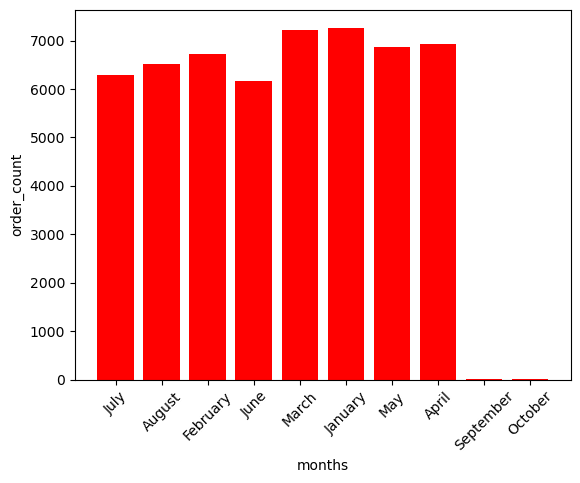

In [14]:
query = """
SELECT MONTHNAME(order_purchase_timestamp) , 
       COUNT(order_id) 
FROM orders 
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY MONTHNAME(order_purchase_timestamp)

"""

cursor.execute(query)
data = cursor.fetchall()
data
df = pd.DataFrame(data, columns = ["months","order_count"])
plt.bar(df["months"],df["order_count"],color = "red")
plt.xlabel("months")
plt.ylabel("order_count")
plt.xticks(rotation = 45)
plt.show()

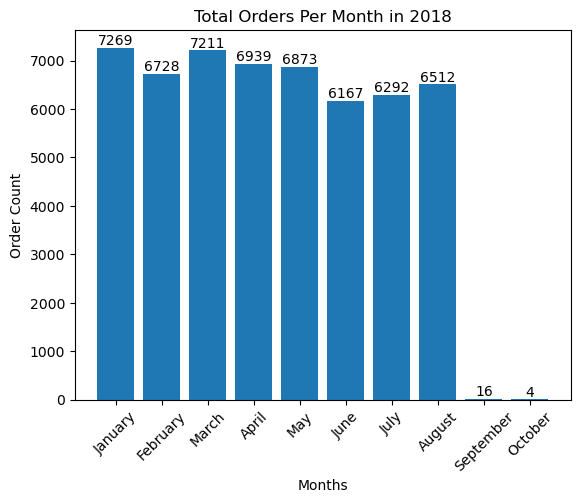

In [15]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

query = """
SELECT MONTHNAME(order_purchase_timestamp) AS months, 
       COUNT(order_id) AS order_count
FROM orders 
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY MONTH(order_purchase_timestamp), MONTHNAME(order_purchase_timestamp)
ORDER BY MONTH(order_purchase_timestamp)
"""

cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data, columns=["months", "order_count"])

fig, ax = plt.subplots()
bars = ax.bar(df["months"], df["order_count"])

ax.bar_label(bars)

plt.xlabel("Months")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.title("Total Orders Per Month in 2018")

plt.show()


# Find the average number of products per order, grouped by customer city.

In [17]:
query = """with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id  = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2)
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by round(avg(count_per_order.oc),2) asc"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Customer city","average orders"])
df.head(10)

,Customer city,average orders
0,sonora,1.00
1,porteiras,1.00
2,itabi,1.00
3,silvanopolis,1.00
4,salmourao,1.00
5,cha de alegria,1.00
6,cerro grande,1.00
7,francisco santos,1.00
8,barras,1.00
9,grupiara,1.00


# Calculate the percentage of total revenue contributed by each product category

In [19]:
query = """
SELECT products.product_category, round((SUM(payments.payment_value)/(select sum(payment_value) from payments))*100,2) AS sales_percent
FROM products
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY products.product_category order by sales_percent desc

"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df

,Category,percentage distribution
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
...,...,...
69,House Comfort 2,0.01
70,cds music dvds,0.01
71,PC Gamer,0.01
72,Fashion Children's Clothing,0.00


# Identify the correlation between product price and the number of times a product has been purchased.

In [41]:
query = """
select products.product_category, count( order_items.product_id),round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category;
"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["product_category","order_count","price"])
arr1 = df["order_count"]
arr2 = df["price"]
a = np.corrcoef([arr1,arr2])
print("the correlation between price and number of times a product has been purchased is",a[0][1])

the correlation between price and number of times a product has been purchased is -0.10631514167157562


# Calculate the total revenue generated by each seller, and rank them by revenue

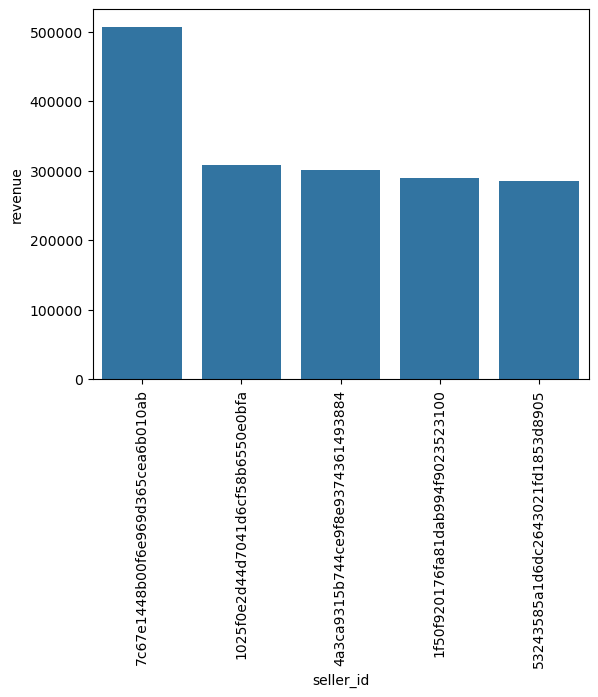

In [77]:
query = """select *, dense_rank() over(order by revenue desc) from (select order_items.seller_id, sum(payments.payment_value)
revenue 
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a
"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue","rank"])
df = df.head()
sns.barplot(x = "seller_id",y = "revenue",data = df)
plt.xticks(rotation = 90)
plt.show()

# Advanced Queries

# Calculate the moving average of order values for each customer over their order history.

In [96]:
query = """SELECT customer_id, 
       order_purchase_timestamp, payment,
       AVG(payment) OVER (
           PARTITION BY customer_id 
           ORDER BY order_purchase_timestamp 
           ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
       ) AS mov_avg
FROM (
    SELECT orders.customer_id, 
           orders.order_purchase_timestamp, 
           payments.payment_value AS payment
    FROM payments 
    JOIN orders ON payments.order_id = orders.order_id
) AS subquery;

"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data)
df = df.head()
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


 # Calculate the cumulative sales per month for each year.

In [147]:
query = """select years, months,total_payment,sum(total_payment)
over(order by years, months) as cumulative_sales from
(SELECT 
    YEAR(orders.order_purchase_timestamp) AS years,
    MONTHNAME(orders.order_purchase_timestamp) AS months,
    round(SUM(payments.payment_value),2) AS total_payment
FROM orders 
JOIN payments ON orders.order_id = payments.order_id
GROUP BY years, months
ORDER BY years, MONTHS) as a;
"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data)
df



,0,1,2,3
0,2016,December,19.62,19.62
1,2016,October,59090.48,59110.10
2,2016,September,252.24,59362.34
3,2017,April,417788.03,477150.37
4,2017,August,674396.32,1151546.69
5,2017,December,878401.48,2029948.17
6,2017,February,291908.01,2321856.18
7,2017,January,138488.04,2460344.22
8,2017,July,592382.92,3052727.14
9,2017,June,511276.38,3564003.52


# Calculate the year-over-year growth rate of total sales.

In [149]:
quer = """
WITH a AS (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        ROUND(SUM(payments.payment_value),2) AS payment 
    FROM orders 
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY years
)
SELECT 
    years, 
    ((payment - LAG(payment,1) OVER(ORDER BY years)) / 
     LAG(payment,1) OVER(ORDER BY years)) * 100 AS year_growth
FROM a
ORDER BY years;
"""

cursor.execute(quer)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=["Years", "Year % Growth"])
df


,Years,Year % Growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [185]:
query = """WITH a AS (
    SELECT 
        customers.customer_id,
        MIN(orders.order_purchase_timestamp) AS first_order_date
    FROM customers 
    JOIN orders ON customers.customer_id = orders.customer_id
    GROUP BY customers.customer_id
),  
order_counts AS (
    SELECT 
        a.customer_id, 
        COUNT(DISTINCT orders.order_purchase_timestamp) AS order_count
    FROM a 
    JOIN orders ON orders.customer_id = a.customer_id
    WHERE orders.order_purchase_timestamp > a.first_order_date
    AND orders.order_purchase_timestamp < DATE_ADD(a.first_order_date, INTERVAL 6 MONTH)
    GROUP BY a.customer_id
),  
b AS (
    SELECT customer_id FROM customers
)
SELECT 100 * (COUNT(DISTINCT order_counts.customer_id) / COUNT(DISTINCT b.customer_id)) AS percentage
FROM order_counts  
LEFT JOIN b ON order_counts.customer_id = b.customer_id"""

cursor.execute(query)
data = cursor.fetchall()
data [0]


(None,)

# Identify the top 3 customers who spent the most money in each year.

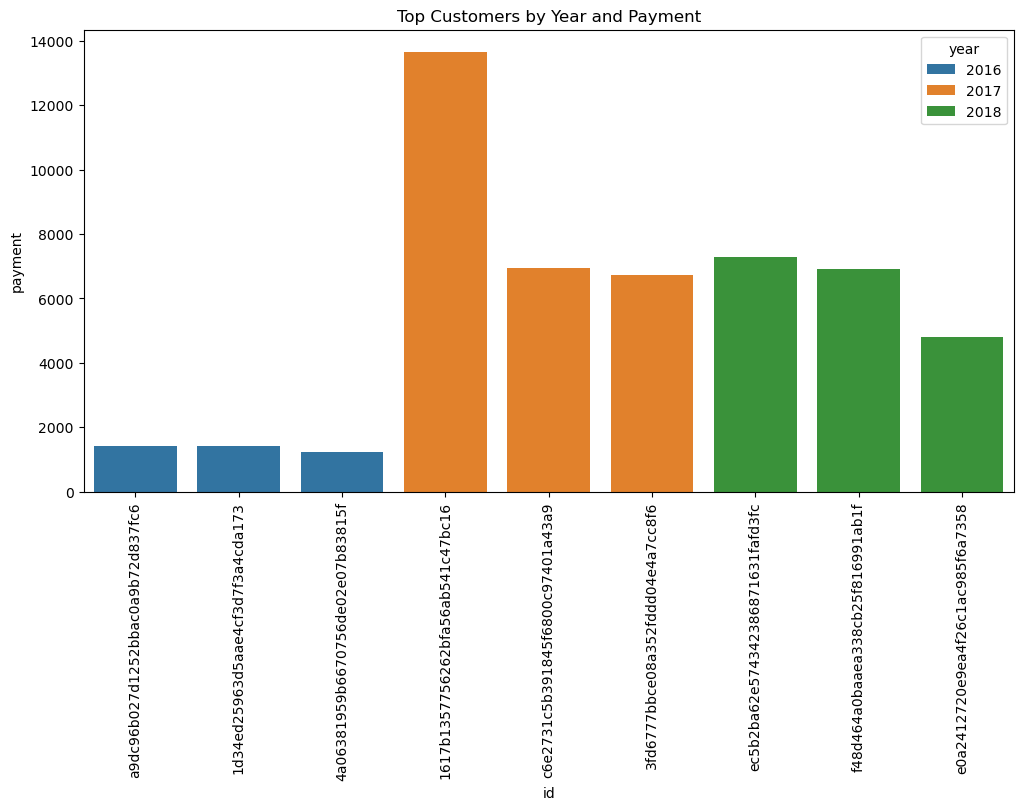

In [200]:
query = """SELECT years, customer_id, payment, d_rank
FROM (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        orders.customer_id,
        SUM(payments.payment_value) AS payment,
        DENSE_RANK() OVER (
            PARTITION BY YEAR(orders.order_purchase_timestamp)
            ORDER BY SUM(payments.payment_value) DESC
        ) AS d_rank
    FROM orders 
    JOIN payments ON payments.order_id = orders.order_id
    GROUP BY YEAR(orders.order_purchase_timestamp), orders.customer_id
) AS a
WHERE d_rank <= 3;
"""

cursor.execute(query)
df = pd.DataFrame(data, columns=["year", "id", "payment", "rank"])
df["year"] = df["year"].astype(str)
plt.figure(figsize=(12, 6))
sns.barplot(x="id", y="payment", data=df, hue="year") 
plt.xticks(rotation=90) 
plt.title("Top Customers by Year and Payment")
plt.show()